In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_binary_health_indicators_BRFSS2015.csv to diabetes_binary_health_indicators_BRFSS2015 (1).csv


In [ ]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
corr_mat = df.corr()
corr_mat

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


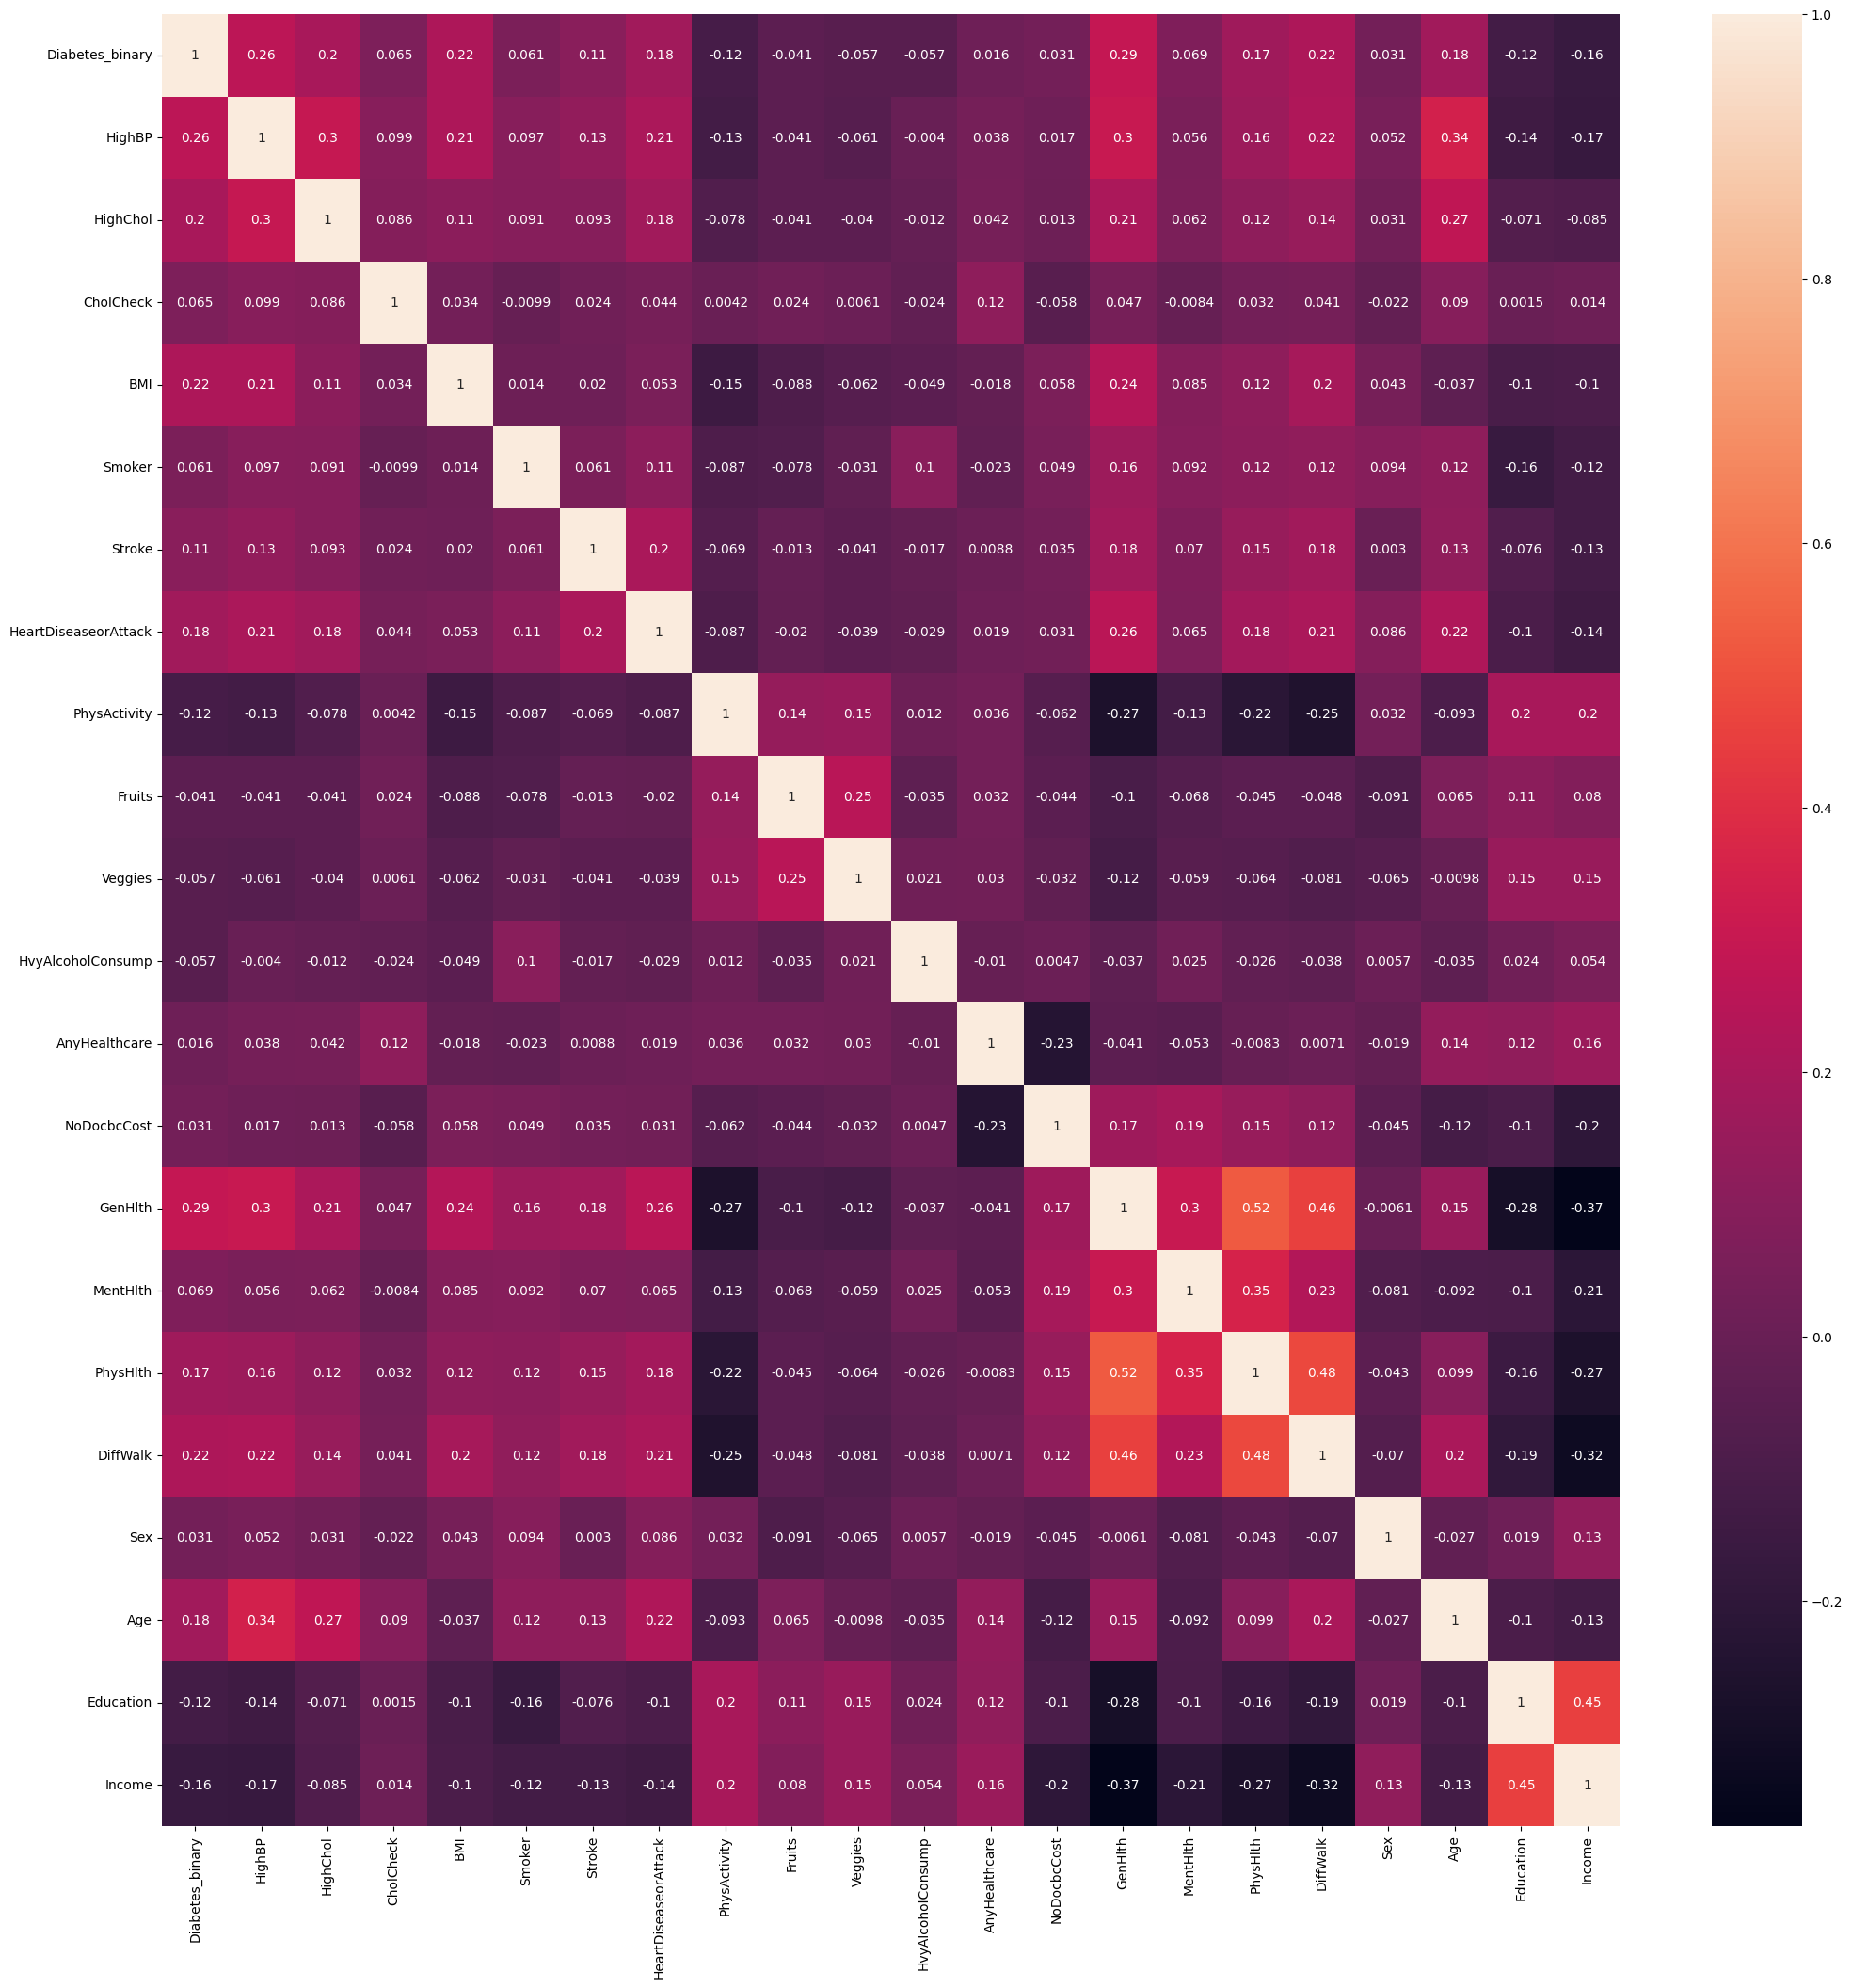

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(corr_mat, annot=True)

plt.show()

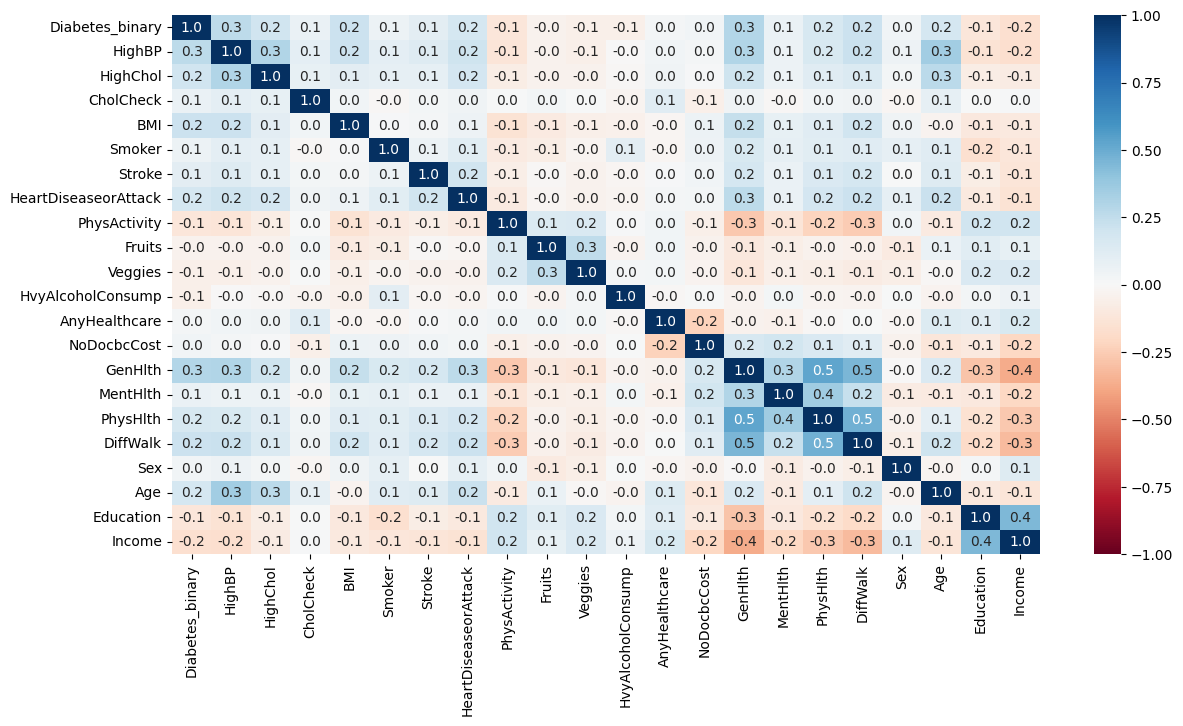

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_mat, annot=True, fmt=".1f",vmin=-1,vmax=1, cmap='RdBu');
plt.show()

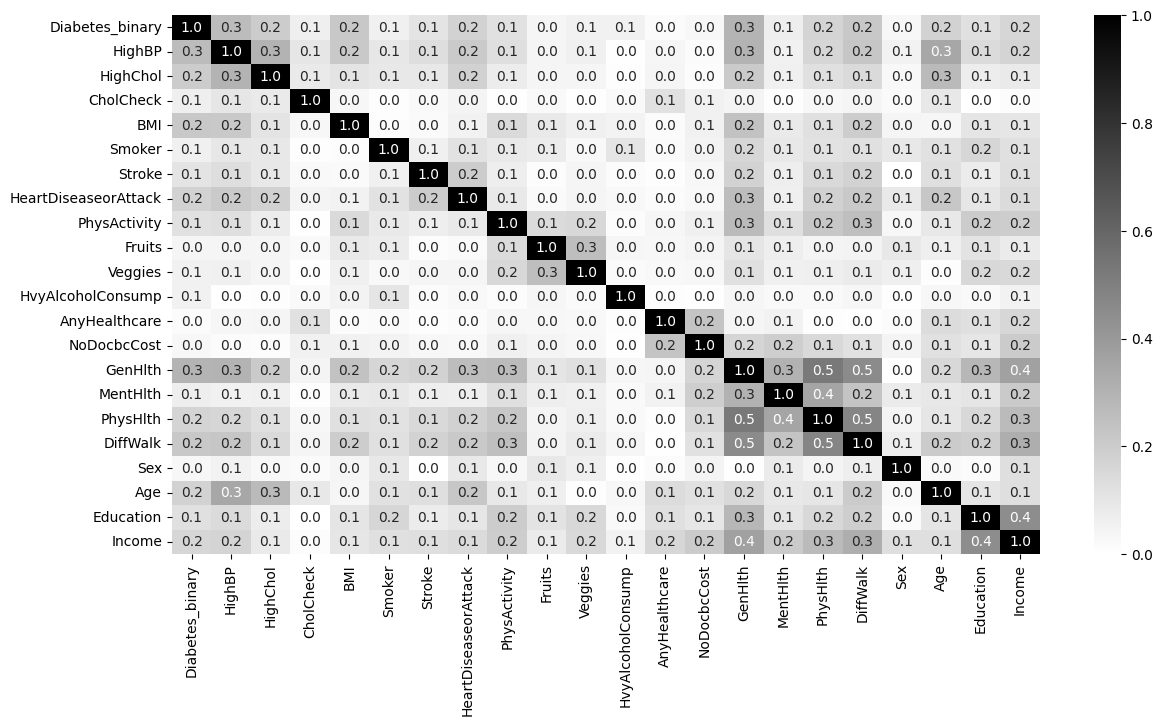

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(np.absolute(corr_mat), annot=True, fmt=".1f", vmin=0, vmax=1, cmap="gray_r");

Variables to drop: Fruits, Veggies, ColCheck, HvyAlcoholConsump, AnyHealthcare, NoDocbcbcCost, Sex


In [ ]:
pcs = PCA()
pcs.fit(df)

PCA()

In [ ]:
print(pcs.explained_variance_ratio_.round(3))
print(np.cumsum(pcs.explained_variance_ratio_).round(3))

[0.482 0.22  0.211 0.048 0.021 0.004 0.003 0.002 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.    0.   ]
[0.482 0.703 0.914 0.961 0.982 0.987 0.99  0.992 0.993 0.994 0.995 0.996
 0.997 0.997 0.998 0.998 0.999 0.999 0.999 1.    1.    1.   ]


In [ ]:
pcsSummary_df = pd.DataFrame({
            '% of variance explained': pcs.explained_variance_ratio_,
            'Cumulative % explained': np.cumsum(pcs.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcsSummary_df.round(3)

,% of variance explained,Cumulative % explained
0,0.482,0.482
1,0.220,0.703
2,0.211,0.914
3,0.048,0.961
4,0.021,0.982
5,0.004,0.987
6,0.003,0.990
7,0.002,0.992
8,0.001,0.993
9,0.001,0.994


In [ ]:
var = list(df.columns)
pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Diabetes_binary,0.01,0.01,-0.00,0.02,-0.01,-0.05,0.06,0.05,0.12,-0.06,...,-0.02,0.00,0.86,-0.45,0.05,-0.14,0.05,-0.01,-0.01,-0.02
HighBP,0.01,0.01,-0.00,0.06,-0.01,-0.09,0.09,0.21,0.46,-0.21,...,0.22,-0.01,-0.17,0.01,-0.00,-0.03,-0.03,-0.02,-0.01,-0.02
HighChol,0.01,0.01,-0.00,0.05,0.00,-0.07,0.08,0.27,0.65,-0.33,...,-0.15,-0.00,-0.09,0.03,-0.01,-0.05,-0.00,-0.02,-0.00,-0.02
CholCheck,0.00,0.00,-0.00,0.01,0.00,-0.00,0.01,-0.00,0.04,-0.02,...,0.01,-0.01,0.02,-0.00,-0.09,0.02,-0.04,0.39,-0.03,0.91
BMI,0.17,0.98,0.10,0.02,0.03,0.03,-0.02,-0.01,-0.01,0.01,...,0.00,-0.00,-0.01,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
Smoker,0.01,-0.00,-0.00,0.02,-0.02,-0.10,-0.01,0.42,-0.01,0.63,...,0.04,-0.08,0.00,-0.04,-0.02,-0.02,-0.07,0.00,-0.00,0.01
Stroke,0.00,-0.00,-0.00,0.01,-0.01,-0.01,0.02,0.01,0.02,-0.00,...,-0.01,-0.01,0.07,0.07,0.01,0.15,0.00,0.03,0.98,0.02
HeartDiseaseorAttack,0.01,0.00,-0.00,0.02,-0.01,-0.04,0.05,0.07,0.07,0.02,...,-0.02,0.01,0.21,0.19,0.08,0.93,0.04,-0.02,-0.17,-0.01
PhysActivity,-0.01,-0.01,0.00,-0.01,0.03,0.08,-0.01,-0.08,0.19,0.20,...,0.86,-0.21,0.10,0.13,-0.00,-0.04,0.00,-0.02,-0.00,-0.01
Fruits,-0.00,-0.01,-0.00,0.01,0.02,0.08,0.00,-0.48,0.49,0.48,...,-0.36,-0.34,-0.03,-0.02,0.01,-0.01,0.03,0.00,-0.00,-0.01


In [ ]:
#scaling the data to run PCA

pcs = PCA()
pcs.fit(preprocessing.scale(df))

# view the importance of principal components
pcsSummary_df = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_df.round(3)

,Proportion of variance,Cumulative proportion
0,0.167,0.167
1,0.082,0.248
2,0.062,0.310
3,0.055,0.365
4,0.053,0.418
5,0.051,0.469
6,0.047,0.516
7,0.043,0.559
8,0.042,0.601
9,0.040,0.641


In [ ]:
pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Diabetes_binary,0.24,0.18,-0.06,0.18,-0.07,-0.28,0.07,-0.07,-0.03,0.14,...,0.55,-0.51,-0.25,0.05,0.16,0.04,0.04,-0.00,0.07,-0.08
HighBP,0.26,0.31,-0.10,-0.00,-0.05,-0.20,0.20,0.05,-0.16,-0.03,...,-0.26,0.04,0.23,-0.12,-0.00,0.57,-0.35,-0.27,0.22,-0.11
HighChol,0.19,0.30,-0.08,-0.03,0.05,-0.17,0.19,0.23,-0.28,-0.41,...,-0.21,0.09,-0.34,0.14,0.06,-0.50,-0.02,-0.11,0.03,-0.03
CholCheck,0.04,0.23,0.08,0.21,-0.08,0.15,0.19,0.68,0.50,0.19,...,0.04,-0.05,-0.05,-0.04,-0.05,0.00,0.04,-0.01,-0.02,-0.00
BMI,0.18,-0.00,-0.13,0.47,-0.04,-0.33,0.22,-0.19,0.03,0.34,...,-0.15,0.28,0.19,0.15,-0.25,-0.12,0.21,0.20,-0.17,-0.10
Smoker,0.15,0.00,-0.17,-0.38,0.34,0.11,0.21,-0.16,0.40,-0.09,...,0.16,-0.17,0.14,0.13,-0.28,0.01,-0.08,-0.08,-0.00,-0.03
Stroke,0.16,0.10,0.08,-0.18,0.11,0.03,-0.51,0.21,-0.22,0.54,...,-0.26,-0.17,-0.06,-0.02,0.07,-0.02,-0.00,0.04,-0.01,-0.01
HeartDiseaseorAttack,0.22,0.21,-0.01,-0.19,0.17,-0.11,-0.36,0.07,0.01,0.05,...,0.44,0.56,-0.04,0.27,-0.18,0.05,-0.02,-0.02,0.05,-0.07
PhysActivity,-0.23,0.10,0.13,-0.12,0.11,-0.25,-0.05,0.28,0.13,-0.09,...,-0.08,0.04,0.19,-0.27,-0.26,-0.14,0.02,0.08,0.04,0.03
Fruits,-0.10,0.16,0.51,-0.18,-0.09,-0.22,0.05,-0.18,0.17,0.08,...,-0.26,-0.23,0.09,0.59,-0.04,-0.08,-0.07,-0.04,0.02,0.02


In [ ]:
eig=pcs.explained_variance_.round(2)
print(eig)

[3.67 1.8  1.36 1.2  1.16 1.12 1.04 0.95 0.92 0.88 0.82 0.79 0.76 0.74
 0.73 0.71 0.7  0.66 0.56 0.51 0.49 0.42]


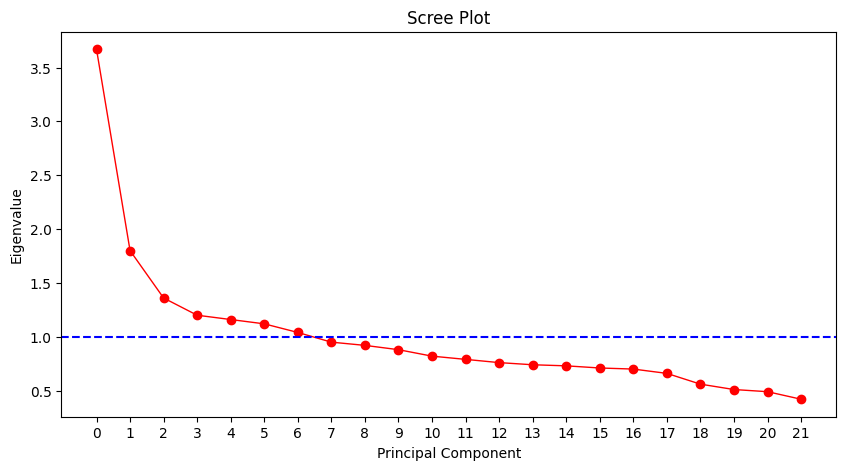

In [ ]:
# scree plot of eigenvalues
# define the x values, i.e., components
xvals = np.arange(df.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

In [ ]:
# droping unnecessary columns
df = df.drop(columns=['Fruits', 'Veggies', 'CholCheck', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost'])
df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Check for duplicates
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 42228


In [ ]:
# Remove duplicates
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

Dataset shape after removing duplicates: (211452, 16)


KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

outcome = 'Diabetes_binary'
predictors = list(df.columns)
predictors.remove(outcome)

# Store predictors and target into X and y, respectively
X = df[predictors]
y = df[outcome]

In [ ]:
# split dataset into training (60%) and test (40%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=2, stratify=y)
print('Training set:', X_train.shape, 'Testing set:', X_test.shape)

# Note, the 'stratify' option ensures that both the y training and y testing data
# have the same proportion of 1's and 0's. For instance, if y_train has
# 10% of entries that are 1 and 90% that are 0, then the stratify option will
# ensure that the y_test data also has 10% 1's and 90% 0's

Training set: (152208, 21) Testing set: (101472, 21)


In [ ]:
# Standardize training and testing features using 'StandardScaler()'
# (a slightly different method than what we did in the PCA lab)

# the first line defines the scaling object
scaler = preprocessing.StandardScaler()

# the second line specifies which data to use to compute means and variances
scaler.fit(X_train)
# important: in this step, you should fit the scaler only to training data,
# and not the testing data. We assume testing data is never available to us
# in the training stage

# the third line scales the data using the means and variances computed in the
# previous step
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Note, there is no need to scale the target y variable, since this is what
# we are trying to predict

In [ ]:
# Run the k-NN model with a random guess about the neighboors, set k=1 for instance
knn = KNeighborsClassifier(n_neighbors=1)
# Specify the training features (X_train) and the outcome they lead to (y_train)
# Important: only use the training data at this step. Do not use test data.
knn.fit(X_train_scaled, y_train)

# Now that the model is done, we can use it to predict whether the new customers
# from the testing data, will accept a loan or not. For this, we feed the
# testing features X_test into the prediction function.
y_pred = knn.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8044583727530747


In [ ]:
# Choosing the best k for the test set
# train a classifier for different "odd" values of k
# using a 'for' loop and range(start, stop, step)

from tqdm import tqdm
results = []
for k in tqdm(range(1, 51, 1)):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)

    # create a dictionary to store the results
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_scaled))
    })

# convert results to a pandas dataframe for better visualization
results_df = pd.DataFrame(results)
results_df

100%|██████████| 50/50 [1:12:32<00:00, 87.04s/it]


,k,accuracy
0,1,0.804458
1,2,0.852698
2,3,0.835639
3,4,0.854177
4,5,0.846519
5,6,0.856177
6,7,0.851890
7,8,0.856877
8,9,0.854728
9,10,0.858365


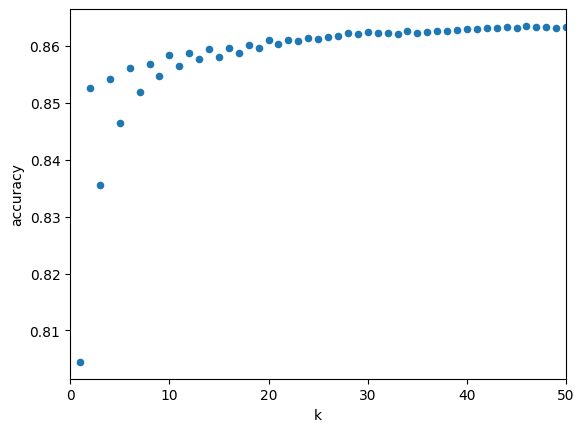

In [ ]:
# plot accuracy vs. k
results_df.plot.scatter(x='k', y='accuracy', xlim=[0, 50]);

In [ ]:
# Find the max value and associated index
max_val = results_df['accuracy'].max()
max_val_idx = results_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", results_df['k'][max_val_idx])

Max value = 0.8635288552507095 |  Best k = 46


In [ ]:
# Show the confusion matrix and accuracy for the test data, using k = 46
knn = KNeighborsClassifier(n_neighbors= 46)
knn.fit(X_train_scaled, y_train)

pred_y = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, pred_y))
print('Accuracy:', accuracy_score(y_test, pred_y))

[[86469   865]
 [12983  1155]]
Accuracy: 0.8635288552507095


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Given confusion matrix values
conf_matrix = [[86469, 865], [12983, 1155]]

# True Positives, False Positives, False Negatives, True Negatives
TP = conf_matrix[1][1]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TN = conf_matrix[0][0]

# Calculating Precision and Recall
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

precision, recall

(0.5717821782178217, 0.08169472344037346)

Logistic regression

Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80     35340
         1.0       0.33      0.75      0.46      6951

    accuracy                           0.71     42291
   macro avg       0.63      0.72      0.63     42291
weighted avg       0.83      0.71      0.75     42291

Confusion Matrix:

[[24822 10518]
 [ 1758  5193]]
ROC-AUC Score: 0.795


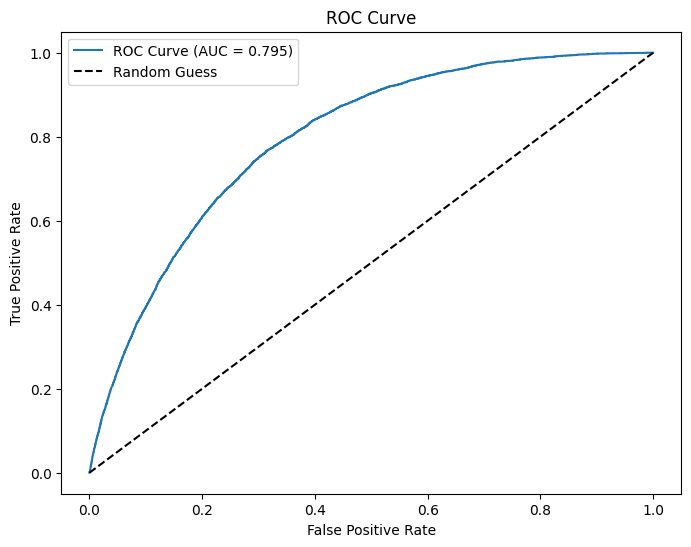

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Split features (X) and target (y)
X = df.drop(columns=['Diabetes_binary'])  # Features
y = df['Diabetes_binary']                # Target

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model with class balancing
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
# Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


1. Precision and Recall
Class 0 (No Diabetes):

Precision: 0.95 (Very high; most predictions for this class are correct).
Recall: 0.73 (Moderate; it misses some individuals in this class).
Class 1 (Diabetes):

Precision: 0.31 (Low; many false positives, meaning non-diabetic people are predicted as diabetic).
Recall: 0.76 (Good; catches most diabetic cases, which is important in healthcare contexts).
2. F1-Score
Class 0: 0.82 (Reflects a good balance between precision and recall).
Class 1: 0.44 (Indicates the model struggles with accurately predicting diabetes cases).
3. Overall Metrics
Accuracy: 0.73 (Misleading due to class imbalance; dominated by Class 0).
Macro Avg: Reflects equal weight for both classes (better than accuracy for this scenario).
Weighted Avg: Weighs by class frequency; aligns more with overall accuracy.
4. ROC-AUC Score
Score: 0.82: Indicates good overall discrimination between the two classes.
5. Confusion Matrix
True Positives (TP): 5380 (Diabetic cases correctly identified).
False Negatives (FN): 1689 (Diabetic cases missed).
True Negatives (TN): 31734 (Non-diabetic cases correctly identified).
False Positives (FP): 11933 (Non-diabetic cases incorrectly flagged as diabetic).


nn

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8590 - loss: 0.3381 - val_accuracy: 0.8677 - val_loss: 0.3098
Epoch 2/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8652 - loss: 0.3175 - val_accuracy: 0.8695 - val_loss: 0.3087
Epoch 3/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8662 - loss: 0.3164 - val_accuracy: 0.8684 - val_loss: 0.3086
Epoch 4/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8659 - loss: 0.3164 - val_accuracy: 0.8678 - val_loss: 0.3106
Epoch 5/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8649 - loss: 0.3157 - val_accuracy: 0.8696 - val_loss: 0.3084
Epoch 6/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8665 - loss: 0.3145 - val_accuracy: 0.8688 - val_loss: 0.3082
Epoch 7/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8663 - loss: 0.3157 - val_accuracy: 0.8676 - val_loss: 0.3093
Epoch 8/15
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8631 - loss: 0

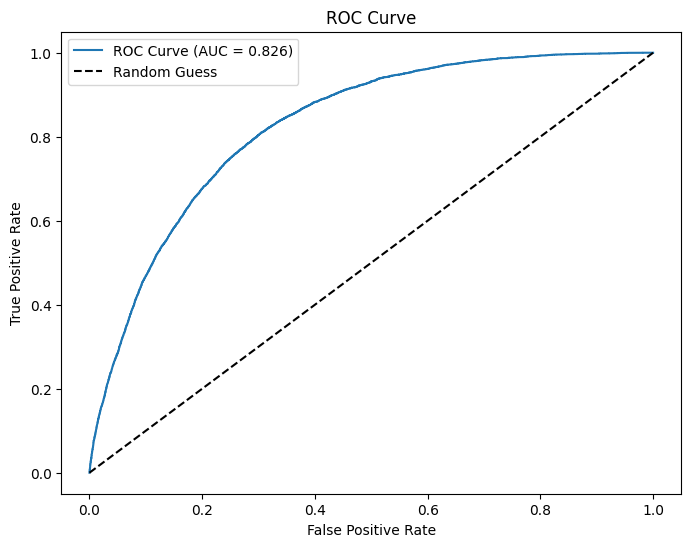

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# Split features (X) and target (y)
X = df.drop(columns=['Diabetes_binary'])  # Features
y = df['Diabetes_binary']                # Target

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer
    Dropout(0.3),                                                          # Dropout for regularization
    Dense(32, activation='relu'),                                          # Second hidden layer
    Dropout(0.2),                                                          # Dropout for regularization
    Dense(1, activation='sigmoid')                                         # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',                  # Adaptive optimizer
    loss='binary_crossentropy',        # Loss function for binary classification
    metrics=['accuracy']               # Tracking accuracy
)

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=15, # change to 10 or 15
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)  # Predicted labels
y_proba = model.predict(X_test_scaled)                    # Predicted probabilities

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The classification report and confusion matrix show that the model performs well in identifying class 0.0 (majority class) with high precision (88%), recall (98%), and f1-score (93%). However, it struggles with class 1.0 (minority class), achieving low recall (14%) and f1-score (23%), indicating difficulty in correctly identifying true positives for this class. The overall accuracy is 87%, but the imbalanced performance is reflected in the macro average metrics (precision: 72%, recall: 56%, f1-score: 58%). The ROC-AUC score of 0.826 suggests the model is moderately good at distinguishing between the two classes.








Imporved NN code, oversampling the minority class (since it was the area the NN struggled the most in) using SMOTE and adjusting the [decision threshold](https://) (from 5 to 3) (Using a lower threshold can help capture more positives for class 1.0):

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8734/8734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7535 - loss: 0.4923 - val_accuracy: 0.7181 - val_loss: 0.5767
Epoch 2/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7813 - loss: 0.4497 - val_accuracy: 0.7457 - val_loss: 0.5233
Epoch 3/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7973 - loss: 0.4260 - val_accuracy: 0.7725 - val_loss: 0.4849
Epoch 4/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8031 - loss: 0.4156 - val_accuracy: 0.8055 - val_loss: 0.4090
Epoch 5/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8077 - loss: 0.4073 - val_accuracy: 0.7330 - val_loss: 0.5202
Epoch 6/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8092 - loss: 0.4007 - val_accuracy: 0.7865 - val_loss: 0.4336
Epoch 7/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8138 - loss: 0.3938 - val_accuracy: 0.7973 - val_loss: 0.4283
Epoch 8/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8159 - loss: 0.3905 - val

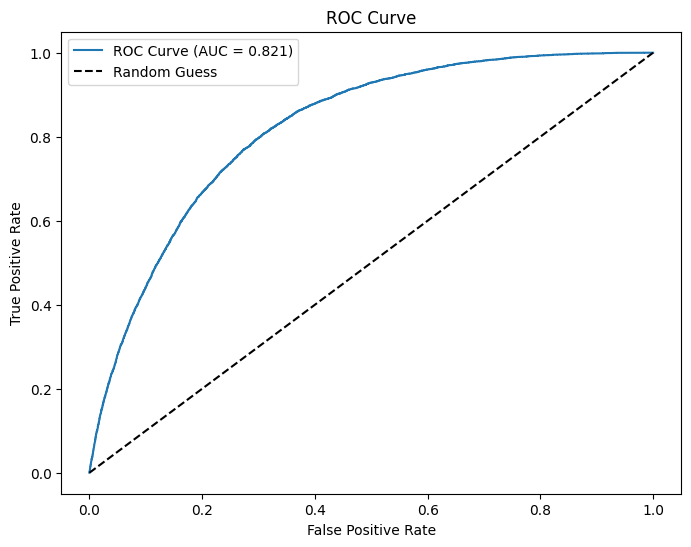

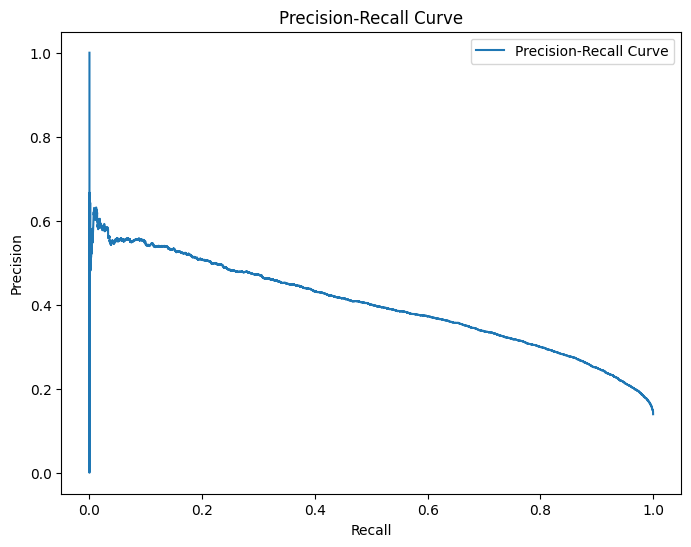

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# Split features (X) and target (y)
X = df.drop(columns=['Diabetes_binary'])  # Features
y = df['Diabetes_binary']                # Target

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer
    Dropout(0.3),                                                          # Dropout for regularization
    Dense(32, activation='relu'),                                          # Second hidden layer
    Dropout(0.2),                                                          # Dropout for regularization
    Dense(1, activation='sigmoid')                                         # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',                  # Adaptive optimizer
    loss='binary_crossentropy',        # Loss function for binary classification
    metrics=['accuracy']               # Tracking accuracy
)

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train_resampled,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_proba = model.predict(X_test_scaled)                     # Predicted probabilities
threshold = 0.4  # Adjusted threshold for better recall on minority class
y_pred = (y_proba > threshold).astype(int)                 # Predicted labels

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Now the results show a significant improvement in recall for class 1.0 (minority class), which has increased to 79%. However, this improvement came at the cost of lower precision for class 1.0 and reduced overall accuracy. The confusion matrix show that the model is identifying more instances of class 1.0 but also misclassifies more instances of class 0.0 as 1.0.  Classification Report for a threshold value = 3:

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81     43667
         1.0       0.30      0.79      0.43      7069

    accuracy                           0.71     50736
   macro avg       0.63      0.75      0.62     50736
weighted avg       0.86      0.71      0.76     50736

Confusion Matrix:

[[30528 13139]
 [ 1462  5607]]
ROC-AUC Score: 0.818

Change of the threshold value to find a better balance, new threshold = 4

Results: the model performs well for the majority class (0.0), with a high precision of 92% and recall of 86%, resulting in an F1-score of 89%. However, the performance for the minority class (1.0) is more modest, with a precision of 38%, indicating a relatively high number of false positives, and a recall of 53%, showing it correctly identifies slightly more than half of the positive cases. The overall accuracy is 82%, and the macro average F1-score of 67% highlights the imbalance in class performance.

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8734/8734 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7532 - loss: 0.4916 - val_accuracy: 0.6935 - val_loss: 0.6229
Epoch 2/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.7800 - loss: 0.4537 - val_accuracy: 0.7572 - val_loss: 0.5332
Epoch 3/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7953 - loss: 0.4282 - val_accuracy: 0.7340 - val_loss: 0.5290
Epoch 4/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8016 - loss: 0.4167 - val_accuracy: 0.7997 - val_loss: 0.4316
Epoch 5/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8052 - loss: 0.4104 - val_accuracy: 0.7784 - val_loss: 0.4717
Epoch 6/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8083 - loss: 0.4051 - val_accuracy: 0.7749 - val_loss: 0.4487
Epoch 7/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8101 - loss: 0.4022 - val_accuracy: 0.7893 - val_loss: 0.4313
Epoch 8/15
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8143 - loss: 0.3952 - val

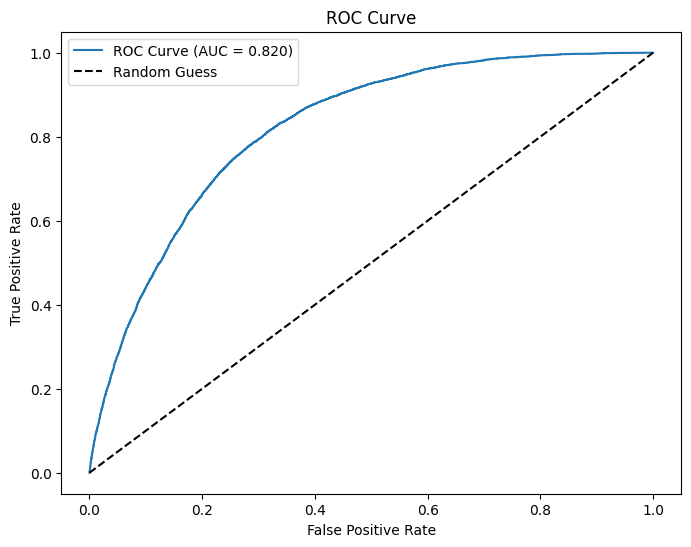

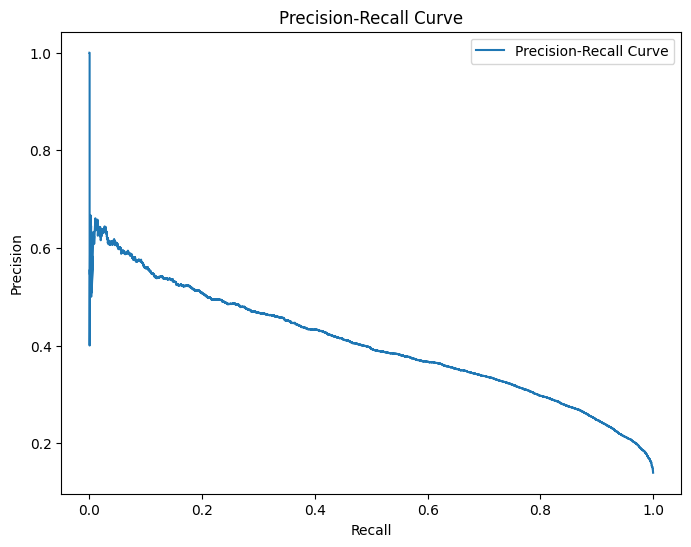

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# Split features (X) and target (y)
X = df.drop(columns=['Diabetes_binary'])  # Features
y = df['Diabetes_binary']                # Target

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer
    Dropout(0.3),                                                          # Dropout for regularization
    Dense(32, activation='relu'),                                          # Second hidden layer
    Dropout(0.2),                                                          # Dropout for regularization
    Dense(1, activation='sigmoid')                                         # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',                  # Adaptive optimizer
    loss='binary_crossentropy',        # Loss function for binary classification
    metrics=['accuracy']               # Tracking accuracy
)

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train_resampled,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_proba = model.predict(X_test_scaled)                     # Predicted probabilities
threshold = 0.5  # Adjusted threshold for better recall on minority class
y_pred = (y_proba > threshold).astype(int)                 # Predicted labels

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.3f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()